In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
short = lambda rho: round(rho, 2)

1.66e-06 A^2/ps
1.27e-06 A^2/ps
1.47e-07 A^2/ps


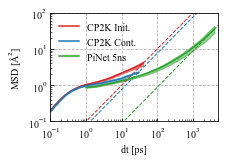

In [2]:
f, ax = plt.subplots(1,1, figsize=[3,2])
exp = '../exp/trial-adam'
ana = f'{exp}/analyses'
rho = 1.0753
# rho = 1.1551
r = short(rho)
xlim = [0.1,5e3]
ylim = [0.1, 100]
which = 1 # 1-> H* 2-> O 3->N*
geos = ['a32b32i0', 'a16b16i16', 'a0b0i32']

def plot_msd(ax, data, which=1, **kwargs):
    t = data[0][:,0]
    msd_mean = np.mean([dat[:,which] for dat in data], axis=0)
    msd_std =  np.std( [dat[:,which] for dat in data], axis=0)
    l, = ax.plot(t, msd_mean, **kwargs)
    print(f'{msd_mean[-1]/t[-1]/6*1e-4:.2e} A^2/ps')
    ax.plot(xlim, np.array(xlim)/t[-1]*msd_mean[-1], lw=1, ls='--', **kwargs)
    ax.fill_between(t, msd_mean-msd_std, msd_mean+msd_std, 
                   alpha=0.5, **kwargs)
    return l
    

data_cp2k = [np.load(f'{ana}/cp2k/{geo}-rho{rho}-msd-10-110ps/msd.npy') for geo in geos]
data_vali = [np.load(f'{ana}/vali/{geo}-r{r}-msd-10-50ps/msd.npy') for geo in geos]
data_trial = [np.load(f'{ana}/trial/{geo}-r{r}-msd-5-10ns/msd.npy') for geo in geos]
l1 = plot_msd(ax, data_cp2k,  which=which, color='tab:red')
l2 = plot_msd(ax, data_vali,  which=which, color='tab:blue')
l3 = plot_msd(ax, data_trial, which=which, color='tab:green')

ax.set_xlim(0, 40)
ax.set_ylim(0, 10)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)
ax.set_xlabel('dt [ps]')
ax.set_ylabel('MSD [$\AA^2$]')
ax.legend([l1, l2, l3], ['CP2K Init.', 'CP2K Cont.', 'PiNet 5ns'], loc=2)
ax.grid()
plt.savefig('figs/fig4-self-diff.png')

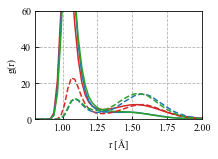

In [3]:
f, ax = plt.subplots(1,1, figsize=[3,2])
exp = '../exp/trial-adam'
ana = f'{exp}/analyses'
rho = 1.0753
r = short(rho)

ho_cp2k = [np.loadtxt(f'{ana}/cp2k/{geo}-rho{rho}-rdf-10-110ps/HO_rdf.dat') for geo in geos]
ho_vali = [np.loadtxt(f'{ana}/vali/{geo}-r{r}-rdf-10-50ps/HO_rdf.dat') for geo in geos]
ho_trial = [np.loadtxt(f'{ana}/trial/{geo}-r{r}-rdf-5-10ns/HO_rdf.dat') for geo in geos]
hn_cp2k = [np.loadtxt(f'{ana}/cp2k/{geo}-rho{rho}-rdf-10-110ps/HN_rdf.dat') for geo in geos]
hn_vali = [np.loadtxt(f'{ana}/vali/{geo}-r{r}-rdf-10-50ps/HN_rdf.dat') for geo in geos]
hn_trial = [np.loadtxt(f'{ana}/trial/{geo}-r{r}-rdf-5-10ns/HN_rdf.dat') for geo in geos]

def plot_rdf(ax, data, which=1, **kwargs):
    rmid = data[0][:,0]
    rdf_mean = np.mean([dat[:,1] for dat in data], axis=0)
    rdf_std =  np.std( [dat[:,1] for dat in data], axis=0)
    l, = ax.plot(rmid, rdf_mean, **kwargs)
    # ax.fill_between(rmid, rdf_mean-rdf_std, rdf_mean+rdf_std, 
    #                alpha=0.2, **kwargs)
    return l

plot_rdf(ax, ho_cp2k,  which=which, color='tab:red')
plot_rdf(ax, ho_vali,  which=which, color='tab:blue')
plot_rdf(ax, ho_trial, which=which, color='tab:green')

plot_rdf(ax, hn_cp2k,  which=which, ls='--',color='tab:red')
plot_rdf(ax, hn_vali,  which=which, ls='--',color='tab:blue')
plot_rdf(ax, hn_trial, which=which, ls='--',color='tab:green')

ax.set_xlim(0.8,2)
ax.set_ylim(0,60)
ax.grid()
ax.set_xlabel('r [$\AA$]')
ax.set_ylabel('g(r)')
plt.savefig('figs/fig3-rdf.png')